# **Import Statements**

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output


## **One Hot Encoding the Target Classes**
This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)


In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# **Creating 3 Important Lists**

1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [ ]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'../content/drive/MyDrive/BrainTumor/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
paths = []
for r, d, f in os.walk(r"../content/drive/MyDrive/BrainTumor/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

 usedfor getting actual image dimension

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

# **Splitting the Data into Training & Testing**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# **Model Building**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

 the first dimension indexes the image and the second indexes the pixel in each image

In [ ]:
y_train.shape

(111, 2)

Fit the model

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 14s 660ms/step - loss: 53.6658 - val_loss: 40.0116
Epoch 2/30
3/3 [==============================] - 0s 91ms/step - loss: 21.0461 - val_loss: 23.6731
Epoch 3/30
3/3 [==============================] - 0s 85ms/step - loss: 6.1357 - val_loss: 14.8878
Epoch 4/30
3/3 [==============================] - 0s 88ms/step - loss: 4.8602 - val_loss: 11.9864
Epoch 5/30
3/3 [==============================] - 0s 83ms/step - loss: 2.2825 - val_loss: 2.2687
Epoch 6/30
3/3 [==============================] - 0s 82ms/step - loss: 1.3629 - val_loss: 1.7489
Epoch 7/30
3/3 [==============================] - 0s 86ms/step - loss: 1.0645 - val_loss: 2.4481
Epoch 8/30
3/3 [==============================] - 0s 81ms/step - loss: 0.3316 - val_loss: 3.5042
Epoch 9/30
3/3 [==============================] - 0s 85ms/step - loss: 0.0774 - val_loss: 4.3277
Epoch 10/30
3/3 [==============================] - 0s 85ms/step - loss: 0.5523 - val_loss: 4.3538
Epoch 11/30
3/3 [====

# **Plotting Losses**

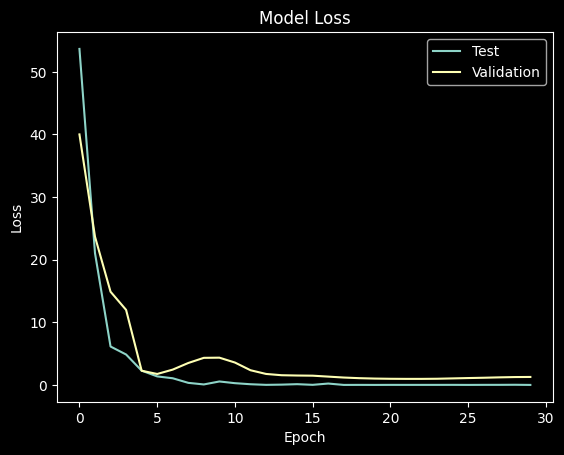

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# **Checking the Model**

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/drive/MyDrive/BrainTumor/no/ no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% ' + names(classification))

FileNotFoundError: ignored

100.0% Its a Tumor


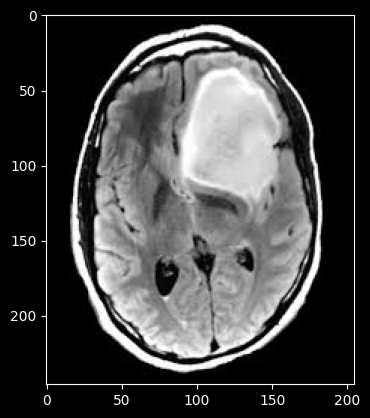

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/drive/MyDrive/BrainTumor/yes/Y105.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% ' + names(classification))

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/drive/MyDrive/BrainTumor/no/14 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% ' + names(classification))

NameError: ignored

NameError: ignored

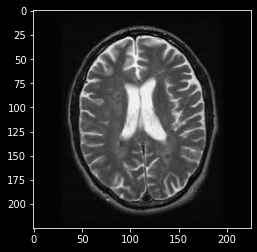

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/drive/MyDrive/BrainTumor/no/21 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% ' + names(classification))


**upload image to predict**

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)

        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])